# Forecasting model to predict future stock prices.

##### This project is an attempt to build a model that predicts the future prices of a chosen public company from the S&P 500, using the  library Prophet to forecast time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

#### Libraries

In [1]:
import pandas as pd
import warnings; 
warnings.simplefilter('ignore')
#Yahoo Finance API
import yahoo_fin.stock_info as yfi
tickers = yfi.tickers_sp500()
import yfinance as yf
# Prophet
from prophet import Prophet
from prophet.plot import plot_plotly
# Interactive plots
import plotly.io as pio
pio.renderers.default = "notebook_connected"



### Functions for this project:

In [2]:
# Reading the data.
def  get_data(ticker):
    stock = yfi.get_data(ticker, start_date = 2022/0o4/0o1, end_date = None, index_as_date = True, interval = "1d")
    stock["date"] = pd.to_datetime(stock.index)
    stock.reset_index(inplace=True)
    stock_data = stock[["close",  "date"]]
    stock_data.columns = ['y', 'ds']
    return stock_data
    
# Create the model 1
def model2(data):
    m = Prophet(daily_seasonality=True)
    # Train the model
    model = m.fit(data)
    future =  model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    return model, forecast 

# Create the model 2
def prophet(stock_data):
    m = Prophet(interval_width=0.95, daily_seasonality=True)
    model = m.fit(stock_data)
    future = m.make_future_dataframe(periods=100,freq='D')
    forecast = m.predict(future)
    return m, forecast

#### Getting the data from yahoo API.

In [ ]:
stock_data = get_data("MSFT")

# Forecasting with Prophet

In [3]:
#Getting the last 20 days to test our forecast.
last_prices = stock_data[len(stock_data)-20:]
last_prices

,y,ds
9098,280.519989,2022-04-18
9099,285.299988,2022-04-19
9100,286.359985,2022-04-20
9101,280.809998,2022-04-21
9102,274.029999,2022-04-22
9103,280.720001,2022-04-25
9104,270.220001,2022-04-26
9105,283.220001,2022-04-27
9106,289.630005,2022-04-28
9107,277.519989,2022-04-29


In [4]:
# Get al the rows ecxept the last 20 to train the model.
data = stock_data[:-20]
data.shape

(9098, 2)

In [5]:
model, forecast =  model2(data)

Initial log joint probability = -504.698
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       22370.9     0.0120524       17232.1      0.3136      0.3136      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       23393.2    0.00925928       2169.97      0.7301      0.7301      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       23653.6    0.00510297       6101.73     0.05825           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       23936.3    0.00904051       1111.19           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       23975.3    0.00399712       784.222           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [6]:
#ploting
plot_plotly(model, forecast)

In [7]:
# Show model prediction for 05/05/2022
forecast[forecast.ds == "2022-05-05"]["yhat"]

9118    265.976565
Name: yhat, dtype: float64

In [8]:
# Show the actual value
last_prices[last_prices.ds == "2022-05-05"]["y"]

9111    277.350006
Name: y, dtype: float64

In [14]:
m, forecast = prophet(stock_data)


Initial log joint probability = -419.844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       22834.8     0.0360267       7039.37           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       23535.7     0.0110617       6445.13           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       23757.2     0.0467317       9752.97           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       23859.9    0.00455461       1524.55      0.3441      0.3441      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       24145.1    0.00219621       1591.11           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9213,2022-08-17,279.102201,253.485154,306.860847,278.335134,280.194117,0.007830,0.007830,0.007830,-0.317742,...,0.058367,0.058367,0.058367,0.267205,0.267205,0.267205,0.0,0.0,0.0,279.110031
9214,2022-08-18,279.201842,250.985927,306.843622,278.420388,280.311153,-0.043192,-0.043192,-0.043192,-0.317742,...,-0.026497,-0.026497,-0.026497,0.301047,0.301047,0.301047,0.0,0.0,0.0,279.158650
9215,2022-08-19,279.301483,251.749953,308.275571,278.508802,280.428190,-0.084461,-0.084461,-0.084461,-0.317742,...,-0.101964,-0.101964,-0.101964,0.335245,0.335245,0.335245,0.0,0.0,0.0,279.217022
9216,2022-08-20,279.401124,251.650426,304.635788,278.597216,280.545227,0.091008,0.091008,0.091008,-0.317742,...,0.039718,0.039718,0.039718,0.369032,0.369032,0.369032,0.0,0.0,0.0,279.492131
9217,2022-08-21,279.500765,252.264835,307.080416,278.685630,280.662263,0.123624,0.123624,0.123624,-0.317742,...,0.039718,0.039718,0.039718,0.401648,0.401648,0.401648,0.0,0.0,0.0,279.624389


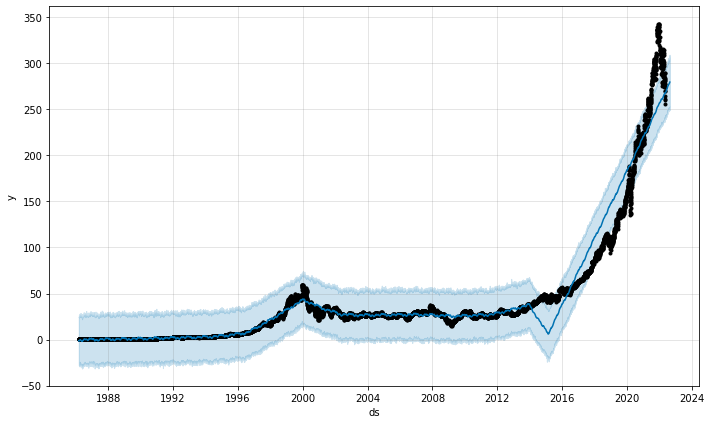

In [15]:
plot1 = m.plot(forecast)

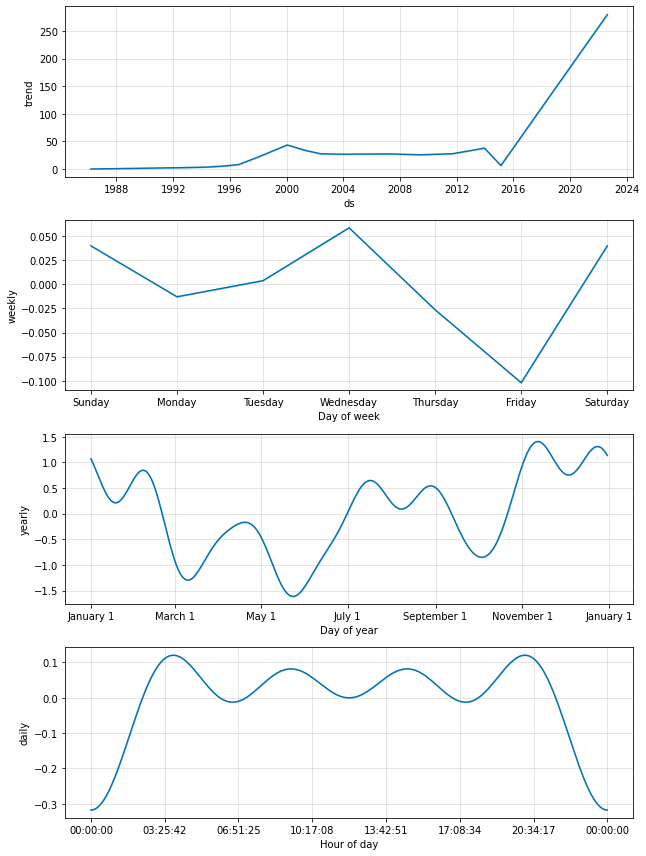

In [16]:

plt2 = m.plot_components(forecast)

params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results